In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df=pd.read_csv("drug200.csv")
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [51]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [52]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [53]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: >

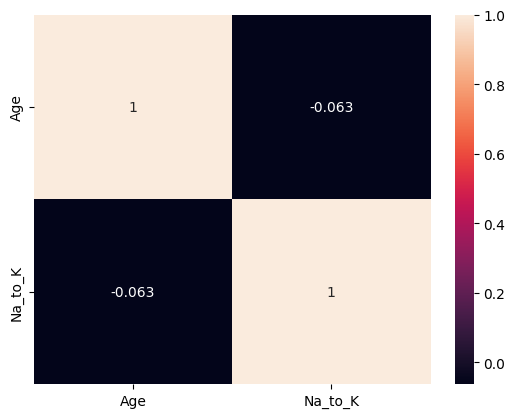

In [54]:
corr_metrics=df.corr(numeric_only=True)
sns.heatmap(corr_metrics,annot=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [56]:
X=df.drop('Drug',axis=1)
y=df['Drug']

In our Target columns we have categorical data so before split we have to performe LabelEncoding because we have small categorical data and we don't have to create saperate columns for each category

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_encoded=le.fit_transform(y)

Doing it before the split ensures both y_train and y_test share the same encoding map.

Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_test.shape , X_train.shape , y_test.shape , y_train.shape

((40, 5), (160, 5), (40,), (160,))

In [59]:
df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [60]:
num_col=['Age','Na_to_K']
cat_col=['Sex','BP','Cholesterol']


In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
preprocessor = ColumnTransformer(
    transformers=[
        ('num_col',StandardScaler(),num_col),
        ('cat_col',OneHotEncoder(handle_unknown='ignore'),cat_col)
    ]
)
model=Pipeline(steps=[
    ('Preprocessor',preprocessor),
    ('KNN',KNeighborsClassifier(n_neighbors=5))
]
)
# Here we have fit whole data which can lead us to Data Leakage (Accuracy was 0.975) (Have a look of Logistic_Regression)
'model.fit(df[num_col+cat_col],y)'
# Now we have to fit X_train and y_train data to avoid Data Leakage (Accuracy was 0.825)
model.fit(X_train,y_train)

,steps,"[('Preprocessor', ...), ('KNN', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_col', ...), ('cat_col', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Prediction

In [62]:
y_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)[:,1]


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
print("Accuracy", accuracy_score(y_test,y_pred))
'''print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1       :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))'''



print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy 0.825

Classification report:
               precision    recall  f1-score   support

       DrugY       0.72      0.87      0.79        15
       drugA       0.86      1.00      0.92         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.40      0.57         5
       drugX       0.90      0.82      0.86        11

    accuracy                           0.82        40
   macro avg       0.90      0.82      0.83        40
weighted avg       0.85      0.82      0.82        40



Prediction for 1 data

In [64]:
new_app=df.iloc[[3]]
pred_prob = model.predict_proba(new_app)[:, 1]
pred = model.predict(new_app)
print(f"Approval probability: {pred_prob[0]:.3f}")
print("Predicted class:", pred[0])

Approval probability: 0.000
Predicted class: drugX


In [65]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(model,f)